# How to make a statistical analysis

Para hacernos una imagen de los datos, lo primero que tenemos que hacer es agruparlos. Al armar diferentes grupos nos vamos acercando a la comprensión de los datos.

 La idea es ir amontonamos las cosas que parecen ir juntas, para poder ver como se distribuyen a través de las diferentes categorías

Descriptive statistics include those that summarize the central tendency, dispersion and shape of a dataset's distribution, excluding ``NaN`` values.

### - Data exploration
Importing the data:
- Formats: csv, json, xlsx.
- Sources  : Local, Internet.
- `pd.read_csv(path)`
1. Explore and identify the type of data to determine which statistical methods to apply
    - the data attributes can be categorical/**cualitative** or numerical/**cuantitative**, depending of the type of variable we can apply different methods.
        - Categorical data : **Object** , **Bool**
        - Numerical data   : **int64**(Discret), **Float64**(Continue)
        - `df.describe(include='all')` Makes an basic statistical analýsis of every attribute
2. Cleaning the data
    - after exploring the data we should be aware of Null values or errors, which will affect the analysis results.
    - we need to decide how to proceed depending in the amount of Null or error values
    - we can remove or fill in the missing data. 

[Dataset](https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction)

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

df = pd.read_csv('/work/heart.csv')

### 1. Data exploration

- it's important to examine the data so we can define the data types, validation, data cleaning
- the first **data exploration** its done using the following methods:
    - `df.shape` to determine the number of attributes and observations
    - `df.head()` & `df.tail()` to show the first and last obsevations of the dataframe
    - `df.sample()` to show n number of random observations
    - `df.dtypes` to specify the **data type** of each column 
    - `df.info()` determines the number of **null values** for each attribute
    - `df.describe()` to recieve a **basic analysis** of the data that includes, mean, std deviation, quartiles and values counts for categorical variables.
    - We can explore or change the columns names with the method:  `df.columns`
    

### 2. Cleaning the data
#### What to do with missing values
- **Verificar** con la persona que recopiló los datos si se puede encontrar el valor faltante
- **Eliminar** los datos donde se encuentra el valor perdido, elimando toda la fila. Solamente se hace cuando son pocas las filas con datos perdidos (no es ideal eliminar datos)
    - con el método `dropna` podemos eliminar los datos, usando los argumentos `axis=0` para eliminar filas y  `axis=1` para eliminar columnas: `df.dropna(axis= 0)`
    - Podemos escoger una columna para buscar los na pasando el argumento `df.dropna(subset=['column_name'], axis=0)`
    - Estos métodos no alteran el dataframe original sino que crean un copia, si deseamos alterar el df debemos pasar el argumento `inplace = True` al final de la función `df.dropna(subset=['column_name'], axis=0, inplace=True)`
- **Reemplazar** los datos, se puede hacer calculando el valor promedio de la variable completa.
    - se utiliza el método `replace(old_data, new_data)` --> `df['columna3'].replace(np.nan, new_value)`
    - `df['column'].fillna(0)` Fill `None` with a number 
    - `df['column'].fillna(method= 'bfill')` Fill `None` with the next index value
    - `df['column'].fillna(method= 'ffill')` Fill `None` with the previous index value
    - `df['column'].fillna(method= 'linear')` Fill `None` with a linear interpolation model



- **Dejar** los datos faltantes como datos perdidos.

In [ ]:
df.rename({'FastingBS':'Diabetes'}, inplace=True)
df['ExerciseAngina'].replace(['Y','N'],[1,0], inplace=True) 
df = df.astype({'ExerciseAngina':'bool'}, copy=False) 
df['RestingBP'].replace(0, 95, inplace=True) 

# replacing 0 values in cholesterol with a normal random distribution from 244 mean and 59 std deviation
# df.loc[df['Cholesterol'] == 0 ,'Cholesterol'] = np.random.normal(244,59, len(df.loc[df['Cholesterol'] == 0]))

#### Medidas de Tendencia Central

Nos dan una noción de donde están los datos usamos el promedio y la mediana principalmente

#### Medidas de dispersión

Con respecto a la medida central nos dice que tan dispersos están los datos

##### Cambiar variables categóricas a numéricas
- La mayoría de algoritmos de machine learning no aceptan cadenas de carácteres como enradas, debemos cambiar las variables categoricas a cualitativas numéricas, porque no se comportan como numeros si no solamente para generar una categoría basada en numeros
- Se utilizar el método `pd.get_dummies(df, columns = ['sex'], drop_first= True)`
- éste método crea tantas nuevas columnas como categorías en el atributo
- en este ejemplo crearía las columas `sex_F` y `sex_M`

#### Realizando un diagrama de frecuencias en un atributo continuo
- debemos agrupar los datos en rangos de datos
    - Encontrar el rango máximo de datos (max - min)
    - Encontrar la cantidad de intervalos o grupos (valor entero): $1+3.22*Log(n)$ `n: numero de datos`
    - Encontrar la amplitud de los intervalos: $\dfrac{range}{groups}$
    - podemos usar `df['columna'].plot.hist(bins= groups)`

##### Agrupando datos con pandas
- podemos agrupar conjuntos de datos numéricos con una categoría si esto facilita los análisis, por ejemplo rangos de edad.
- utilizamos el método `pd.cut`
- primero creamos una variable bins con una lista de los rangos `bins = [0,5,12,24,40,60,100]`
- `names = ['1','2','3','4','5','6']` variable con el nombre de etiqueta de los nuevos rangos
- `df['Edad'] = pd.cut(df['Edad'], bins, labels= names)`

In [ ]:
df = pd.get_dummies(df, columns = ['Sex','ChestPainType','RestingECG','ST_Slope'], drop_first= True)

In [ ]:
df.shape

(918, 16)

In [ ]:
column = df.pop('HeartDisease')
df.insert(15, 'HeartDisease', column)

In [ ]:
df.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ST_Slope_Flat,ST_Slope_Up,HeartDisease
0,40,140,289,0,172,False,0.0,1,1,0,0,1,0,0,1,0
1,49,160,180,0,156,False,1.0,0,0,1,0,1,0,1,0,1
2,37,130,283,0,98,False,0.0,1,1,0,0,0,1,0,1,0
3,48,138,214,0,108,True,1.5,0,0,0,0,1,0,1,0,1
4,54,150,195,0,122,False,0.0,1,0,1,0,1,0,0,1,0


<AxesSubplot:xlabel='HeartDisease', ylabel='Cholesterol'>

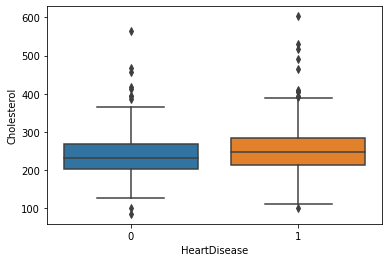

In [ ]:
df1 = df[df['Cholesterol']>0]
sns.boxplot(x='HeartDisease', y='Cholesterol', data=df1)

We can create a series of bool values by evaluating a column with an expression 

## Linear Regression

Before creating a more complex model than linear regression, it really helps to have knowledge of how the scikit-learn estimator API works. This will not only make more complex models will be easier to understand, but also show you some common mistakes like assuming your data doesn't have missing values.

importing libraries:
```
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
```

1. Fill or remove missing values
##### 2. Arrange Data into **Features Matrix** and **Target Vector**
- Convert Pandas dataframe into numpy arrays



In [ ]:
features = list(df1.columns)[:-1]
X  = df1.loc[:, features].values #full 11 features, X capital because is a matrix
X1 = df1.loc[df1['HeartDisease']==1,['Cholesterol']].values # only feature for linear regression
y  = df1.loc[:,'HeartDisease'].values

##### 3. import the model you want to use and create an instance #every model it's treated like an object oriented programing
- if you want to see what you can tune for a model, you can use the help function `help(LinearRegression)`


In [ ]:
reg = LinearRegression(fit_intercept=True, normalize=False)

##### 4. Training the model on the data, Model is learning the relationship between x and y `reg.fit(X,y)`


In [ ]:
reg.fit(X,y)

/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/linear_model/_base.py:155: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  FutureWarning,


LinearRegression(normalize=False)

##### 5. Predict the values of new data. Uses the information the model learned during the model training process
- Predict for one observation, input needs to be two dimensional `reg.predict(X[0].reshape(1,-1))`
- Predict for multiple observations at once, `reg.predict(X[0:10])`

In [ ]:
reg.predict(X[225].reshape(1,-1)) # Input needs to be two dimensional (reshape makes input two dimensional )

array([0.70813842])

##### Measuring model performance:

Unlike classification models where a common metric is accuracy, regression models use other metrics like $r^2$, the coefficient of determination to quantify your model's performance. The best possible score is 1.0. A constant model that never predicts the expected value of y, disregarding the input features, would get a $r^2$ score of 0.0.

In [ ]:
score = reg.score(X, y)
print(score) #pretty bad score

0.5810543810606663


After you fit an instance of a model in scikit-learn, you can use additional attributes:

In [ ]:
m = reg.coef_[0] # slope of the line
b = reg.intercept_ # intersection point with the Y axis
print(f'formula: y = {m:.2f}x + {b}')

formula: y = 0.00x + 0.04604865549829423


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=1e370e8e-dbeb-4c83-b321-fe23667b91ee' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>